<a href="https://colab.research.google.com/github/Yassmina-Abdo/unsupervised_learning/blob/main/customerSegmentation_ClusteringComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#Loading Data

In [ ]:
data =pd.read_csv('/content/marketing_campaign.csv',sep='\t',parse_dates=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i



> ## 1. Deal With Missing Data



In [ ]:
data = data.dropna()
print(len(data))

2216




> ## 2. Encoding Categorical 



In [ ]:
data['Marital_Status']=LabelEncoder().fit_transform(data['Marital_Status'])
data['Education']=LabelEncoder().fit_transform(data['Education'])



> ## 3. Dealing With Date



In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Day']= data['Dt_Customer'].dt.day
data['Month']= data['Dt_Customer'].dt.month
data['Year']= data['Dt_Customer'].dt.year

data= data.drop(['Dt_Customer'],axis=1)
print(data.shape)

(2216, 31)




> ## 4. Features Scaling



In [ ]:
df= data.copy()

features =df[df.columns]
scaler = MinMaxScaler()
df[df.columns] =scaler.fit_transform(features.values)

# Dimentionality Reduction With PCA

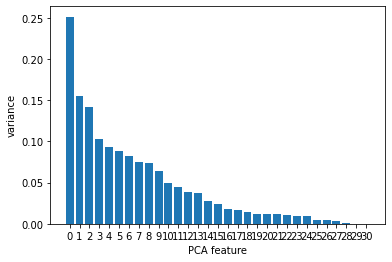

In [ ]:
model = PCA()
pca_df = model.fit(df)

features= range(pca_df.n_components_)
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
def pca(df,n_components):
  model = PCA(n_components= n_components)
  reduced_df =pd.DataFrame( model.fit_transform(df))
  print(reduced_df.shape)
  return reduced_df




*   Let's Try one of the clustering algorithms to choose which no of components should be pass to PCA












**Try with 3 Components**





In [ ]:
reduced_df=pca(df,3)

(2216, 3)


# Clustering Algorithms



 >## 1. KMeans





> ### Elbow



In [ ]:
def kmeans_elbow(df):
  ks = range(1, 15)
  inertias = []

  for k in ks:
      model = KMeans(n_clusters=k)
      model.fit(df)
      inertias.append(model.inertia_)
      
  # Plot ks vs inertias
  plt.plot(ks, inertias, '-o')
  plt.xlabel('number of clusters, k')
  plt.ylabel('inertia')
  plt.xticks(ks)
  plt.show()




> ### Kmeans Sklearn Model



In [ ]:
def k_means(reduced_df,k):

  kmeans_df=reduced_df.copy()
  kmeans_cls = KMeans(n_clusters=k)
  kmeans_cls.fit(kmeans_df)
  kmeans_df['labels'] =kmeans_cls.labels_
  #test
  print("Silhouette Coefficient of Kmeans Clustering: %0.3f"  % silhouette_score(kmeans_df, kmeans_cls.labels_))
  sns.scatterplot(kmeans_df.iloc[:,0],kmeans_df.iloc[:,1],hue='labels',data=kmeans_df)
  plt.show()


> ### Test

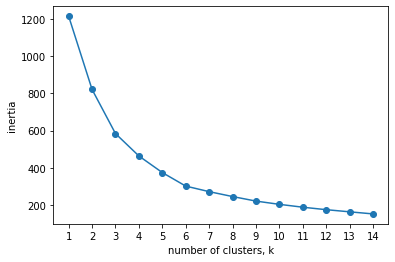

In [ ]:
kmeans_elbow(reduced_df)

Silhouette Coefficient of Kmeans Clustering: 0.704


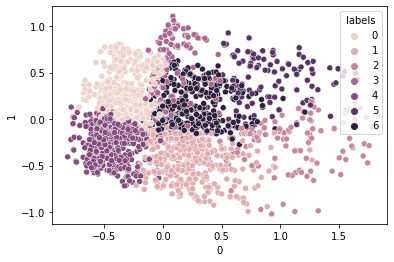

In [ ]:
k_means(reduced_df,7)

**Try PCA with 2 components**

(2216, 2)


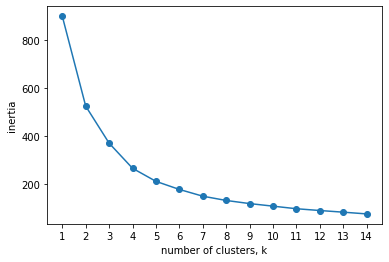

In [ ]:
reduced_df=pca(df,2)
kmeans_elbow(reduced_df)

Silhouette Coefficient of Kmeans Clustering: 0.754


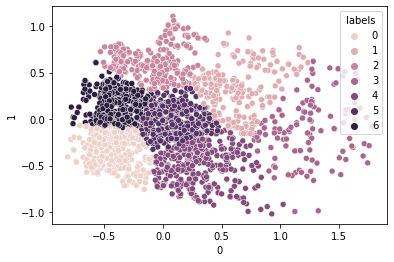

In [ ]:
k_means(reduced_df,7)

>## 2. Hierarchical


>### Dendogram

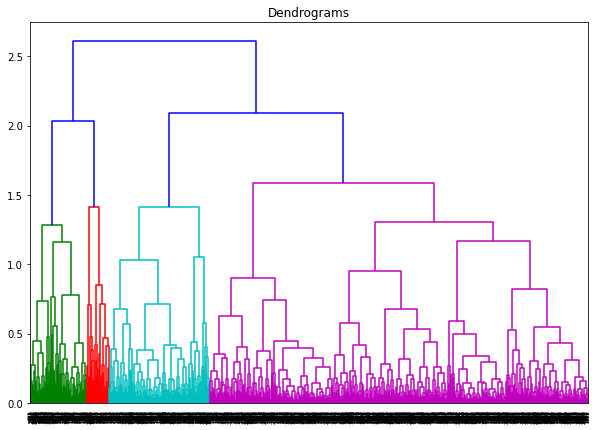

In [ ]:
distance_matrix = linkage(reduced_df,method='complete',metric='euclidean')
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
_=dendrogram(distance_matrix)

>### Fcluster Scipy 

In [ ]:
def Hierarchical(df,distances,n_clusters):
  hier_df =df.copy()
  hier_df['labels'] = fcluster(distances, n_clusters, criterion='maxclust')

  #test
  print("Silhouette Coefficient of hierarchical Clustering: %0.3f"  % silhouette_score(hier_df, hier_df['labels']))
  sns.scatterplot(hier_df.iloc[:,0],hier_df.iloc[:,1],hue='labels',data=hier_df)
  plt.show()

>### Test

Silhouette Coefficient of hierarchical Clustering: 0.577


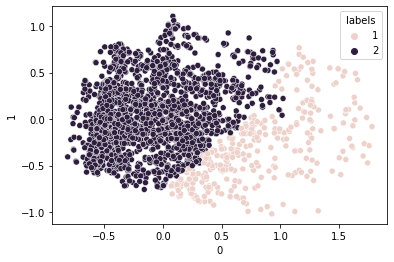

In [ ]:
Hierarchical(reduced_df,distance_matrix,2)

Silhouette Coefficient of hierarchical Clustering: 0.602


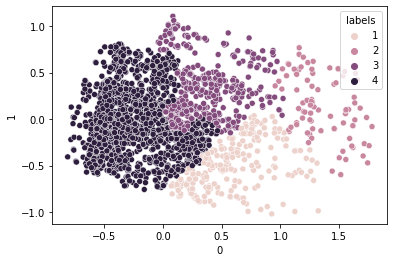

In [ ]:
Hierarchical(reduced_df,distance_matrix,4)

Silhouette Coefficient of hierarchical Clustering: 0.648


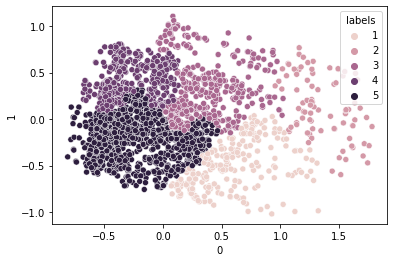

In [ ]:
Hierarchical(reduced_df,distance_matrix,5)

Silhouette Coefficient of hierarchical Clustering: 0.669


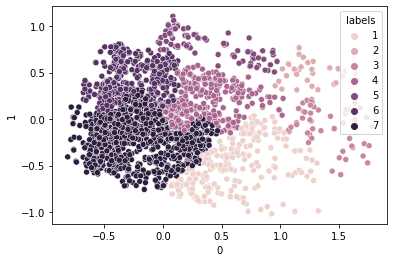

In [ ]:
# as the kmean --Silhouette Coefficient of Kmeans Clustering: 0.642 here -->  0.669
Hierarchical(reduced_df,distance_matrix,7)

Silhouette Coefficient of hierarchical Clustering: 0.698


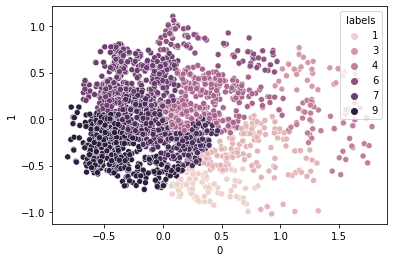

In [ ]:
Hierarchical(reduced_df,distance_matrix,9)

Silhouette Coefficient of hierarchical Clustering: 0.722


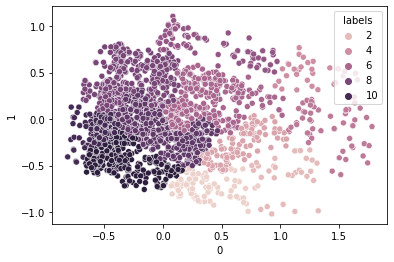

In [ ]:
Hierarchical(reduced_df,distance_matrix,11)

>## 3. DBSCAN

>### 1. Find Ideal eps hyperparameter

In [ ]:
def K_neighbor(df):
  
  neigh = NearestNeighbors(n_neighbors=2)
  nbrs = neigh.fit(df)
  distances, indices = nbrs.kneighbors(df)

  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)
  plt.title('K-distance Graph',fontsize=20)
  plt.xlabel('Data Points sorted by distance',fontsize=14)
  plt.ylabel('Epsilon',fontsize=14)
  plt.show()

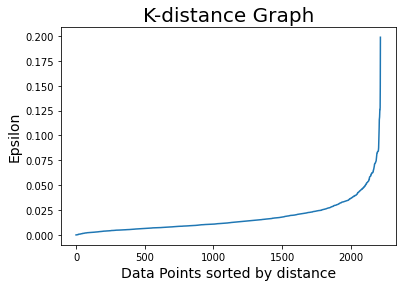

In [ ]:
K_neighbor(reduced_df)

>### 2. Find Ideal min_samples hyperparameter

In [ ]:
def Find_minsamples(df):
  samples=[3,4,5,6,7,8,9,10]
  for i in samples:
    db_df =df.copy()
    db_cls = DBSCAN(eps=0.0375,min_samples=i).fit(df)
    db_df['labels']=db_cls.labels_ 
    #test
    print(" For no of samples= "+str(i)+"--->Silhouette Coefficient of DBSCAN Clustering: %0.3f"  % silhouette_score(db_df,  db_df['labels']))
    

In [ ]:
Find_minsamples(reduced_df)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.655
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.652
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.649
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.657
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: 0.627
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: 0.610
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: 0.581
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: 0.554


>### 3. Complete DBSCAN

In [ ]:
def dbscan(df,eps,min_samples):
  db_df =df.copy()
  db_cls = DBSCAN(eps=eps,min_samples=min_samples).fit(df)
  db_df['labels']=db_cls.labels_ 
  #test
  print("Silhouette Coefficient of DBSCAN Clustering: %0.3f"  % silhouette_score(db_df,  db_df['labels']))
  sns.scatterplot(db_df.iloc[:,0],db_df.iloc[:,1],hue='labels',data=db_df)
  plt.show()

Silhouette Coefficient of DBSCAN Clustering: 0.657


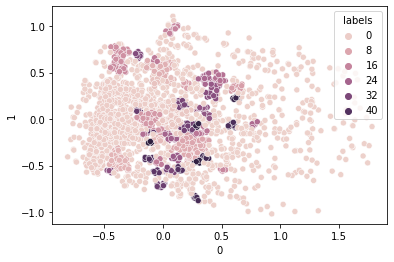

In [ ]:
dbscan(reduced_df,eps=0.0375,min_samples=6)

>## 4. Gaussian Mixture

>### Find Ideal No of Components

In [ ]:
def Find_k_gmm(df):
  n_range = range(3,15)
  bic_score = []
  aic_score = []
  for n in n_range:
      gm = GaussianMixture(n_components=n,random_state=123, n_init=15).fit(df)
      
      bic_score.append(gm.bic(df))
      aic_score.append(gm.aic(df))

  fig, ax = plt.subplots(figsize=(12,8),nrows=1)
  ax.plot(n_range, bic_score, '-o', color='orange')
  ax.plot(n_range, aic_score, '-o', color='green')
  ax.set(xlabel='Number of Clusters', ylabel='Score')
  ax.set_xticks(n_range)    


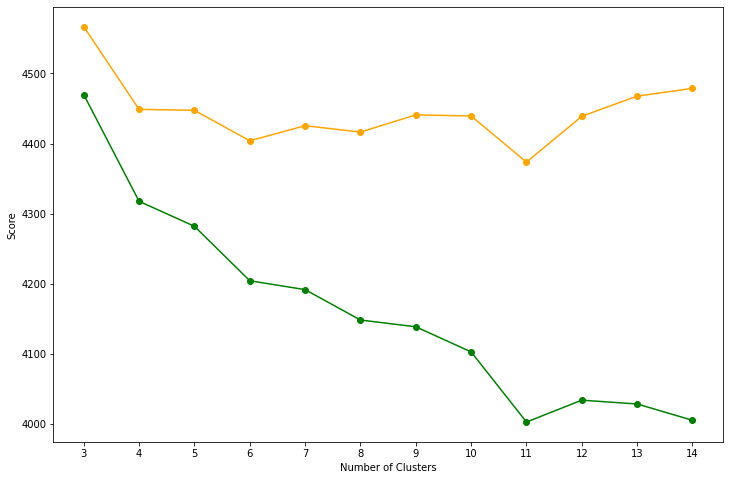

In [ ]:
Find_k_gmm(reduced_df)

>### Gmm

In [ ]:
def gmm(df,n_components):
  gmm_df=df.copy()
  gmm = GaussianMixture(n_components=n_components).fit(gmm_df)
  labels = gmm.predict(gmm_df)
  gmm_df['labels'] = labels
  print("Silhouette Coefficient of GMM Clustering: %0.3f"  % silhouette_score(gmm_df, gmm_df['labels']))
  sns.scatterplot(gmm_df.iloc[:,0],gmm_df.iloc[:,1],hue='labels',data=gmm_df)
  plt.show()
  

>### Test

Silhouette Coefficient of GMM Clustering: 0.788


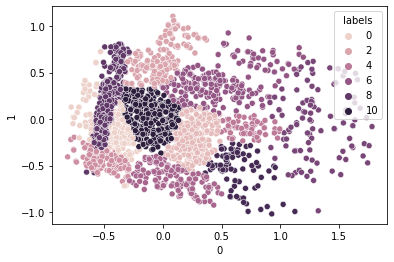

In [ ]:
gmm(reduced_df,n_components=11)

# Results Comparison

Silhouette Coefficient of Kmeans Clustering: 0.759


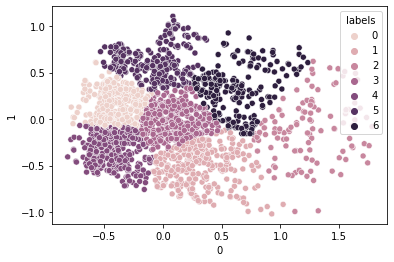

Silhouette Coefficient of hierarchical Clustering: 0.722


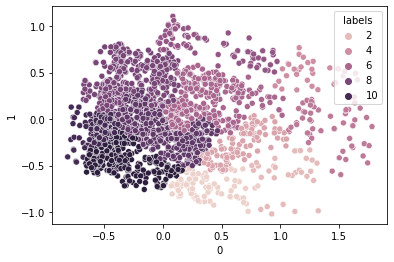

Silhouette Coefficient of DBSCAN Clustering: 0.657


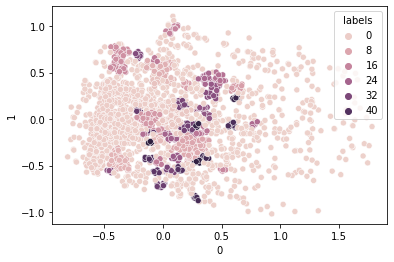

Silhouette Coefficient of GMM Clustering: 0.792


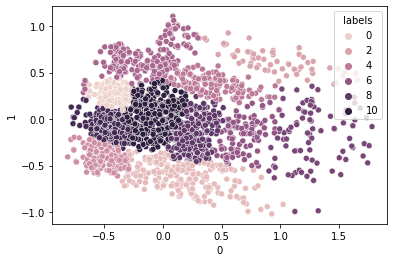

In [ ]:
k_means(reduced_df,7)
Hierarchical(reduced_df,distance_matrix,11)
dbscan(reduced_df,eps=0.0375,min_samples=6)
gmm(reduced_df,n_components=11)